In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_test.shape

(10000,)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)) 

In [8]:
x_train = x_train.astype('float32')/255.0  #Normalizing range 0-255 to 0-1
x_test = x_test.astype('float32')/255.0

In [9]:
from numpy import unique, argmax

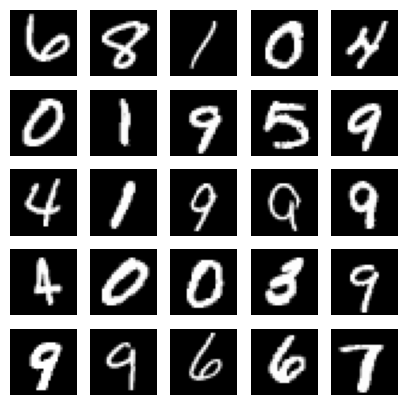

In [10]:
figure = plt.figure(figsize=(5,5))
j = 1
for i in np.random.randint(0,10000,25):
    plt.subplot(5,5,j); j+=1
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    

In [11]:
img_shape = x_train.shape[1:]
img_shape

(28, 28, 1)

In [12]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [13]:
y_train[12]

3

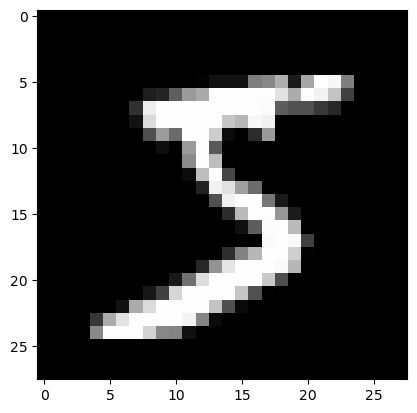

In [14]:
plt.imshow(np.squeeze(x_train[0]), cmap='gray')

In [15]:
x_train.ndim

4

In [16]:
x_train.shape

(60000, 28, 28, 1)

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model

In [18]:
mod = Sequential()
mod.add((Conv2D(32, (3,3), activation='relu', input_shape=img_shape)))
mod.add((MaxPool2D((2,2))))
mod.add(Conv2D(48, (3,3), activation='relu'))
mod.add((MaxPool2D((2,2))))
mod.add(Dropout(0.5))
mod.add(Flatten())
mod.add(Dense(500, activation='relu'))
mod.add(Dense(10, activation='softmax'))

In [19]:
mod.build()
mod.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

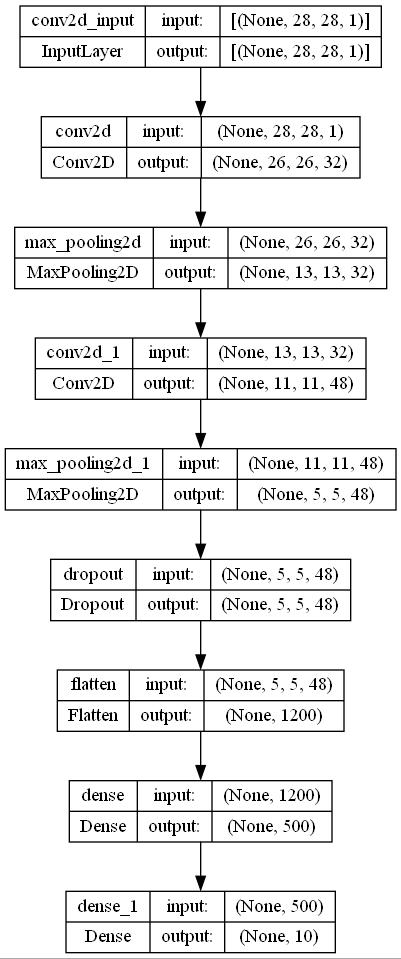

In [20]:
plot_model(mod, 'model.jpg', show_shapes=True)

In [21]:
mod.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
x = mod.fit(x_train, y_train, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 48s - loss: 0.2469 - accuracy: 0.9234 - val_loss: 0.0598 - val_accuracy: 0.9830 - 48s/epoch - 113ms/step
Epoch 2/10
422/422 - 49s - loss: 0.0834 - accuracy: 0.9739 - val_loss: 0.0458 - val_accuracy: 0.9862 - 49s/epoch - 115ms/step
Epoch 3/10
422/422 - 42s - loss: 0.0612 - accuracy: 0.9804 - val_loss: 0.0348 - val_accuracy: 0.9895 - 42s/epoch - 100ms/step
Epoch 4/10
422/422 - 36s - loss: 0.0497 - accuracy: 0.9842 - val_loss: 0.0349 - val_accuracy: 0.9908 - 36s/epoch - 85ms/step
Epoch 5/10
422/422 - 40s - loss: 0.0445 - accuracy: 0.9857 - val_loss: 0.0307 - val_accuracy: 0.9908 - 40s/epoch - 94ms/step
Epoch 6/10
422/422 - 37s - loss: 0.0369 - accuracy: 0.9886 - val_loss: 0.0305 - val_accuracy: 0.9920 - 37s/epoch - 87ms/step
Epoch 7/10
422/422 - 39s - loss: 0.0305 - accuracy: 0.9895 - val_loss: 0.0261 - val_accuracy: 0.9930 - 39s/epoch - 93ms/step
Epoch 8/10
422/422 - 48s - loss: 0.0285 - accuracy: 0.9901 - val_loss: 0.0282 - val_accuracy: 0.9917 - 48s/epoch - 114ms/s

In [22]:
loss, accuracy = mod.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 99.33000206947327


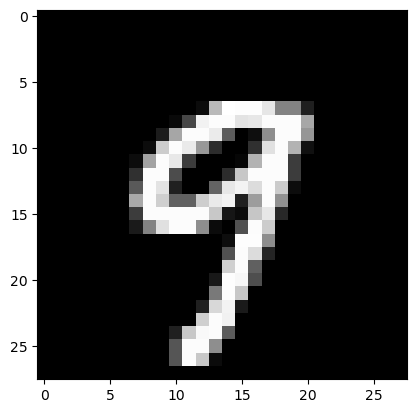

In [23]:
image = x_train[45]
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

In [24]:
image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
p = mod.predict([image])
print('Predicted: {}'.format(argmax(p)))

1/1 [==============================] - 0s 172ms/step
Predicted: 9


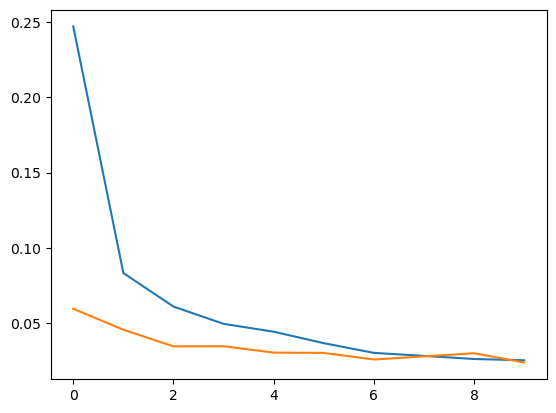

In [25]:
plt.plot(x.history['loss'])
plt.plot(x.history['val_loss'])

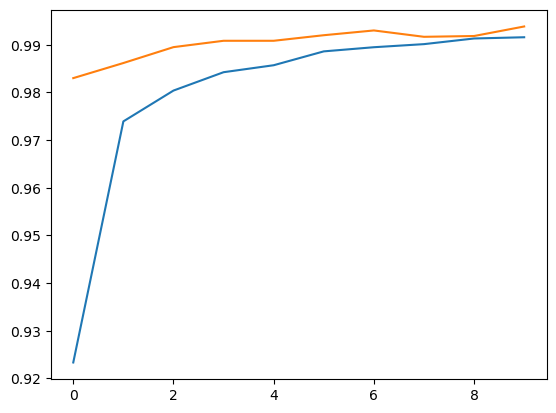

In [26]:
plt.plot(x.history['accuracy'])
plt.plot(x.history['val_accuracy'])

# Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [28]:
y_predict = mod.predict(x_test).round(2)
y_predict

313/313 [==============================] - 3s 10ms/step


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [29]:
mod.evaluate(x_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0200 - accuracy: 0.9933


[0.02002863399684429, 0.9933000206947327]

<Axes: >

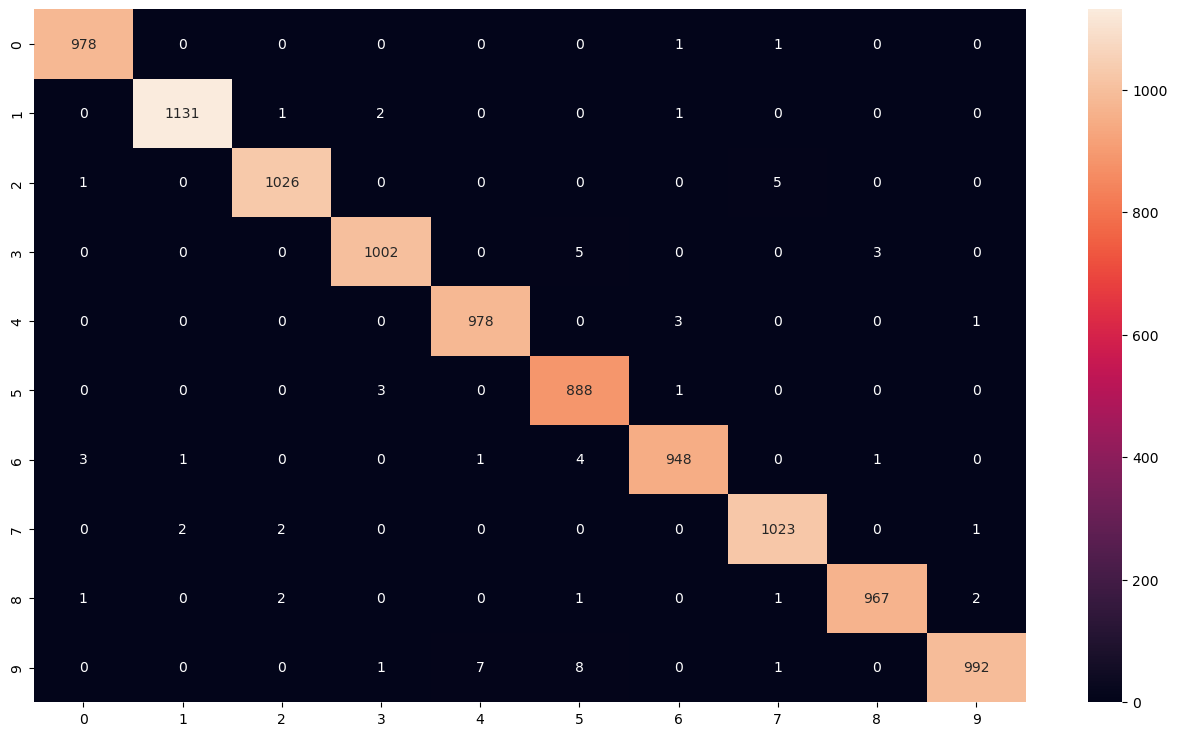

In [30]:
plt.figure(figsize=(16,9))
y_predict_labels = [np.argmax(label) for label in y_predict]
cm = confusion_matrix(y_test, y_predict_labels)
sns.heatmap(cm, annot=True, fmt='d')

In [31]:
cr = classification_report(y_test, y_predict_labels)
print(cr)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      1.00      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       1.00      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

